In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import heapq
import os
from decimal import Decimal
np.set_printoptions(threshold=np.nan) 
home_path = os.getcwd().replace('BC1/notebooks','')
import cPickle as pickle
import pandas as pd

import json

import copy
import matplotlib as mpl

from sklearn.decomposition import FastICA

In [2]:
with open("separate_BC.json", "r") as read_file:
    json_file = json.load(read_file)
name_json = json_file["file_name"]
split = name_json.split('.')
run_number = split[1][2:7]
single_anode_channel = int(json_file["single_anode_channel"])
number_tubes_json = len(json_file["tubes"])

#opening the file

dictionary_path = home_path+'processed_data/Dados BC1/'
file = open(dictionary_path+name_json+'_separate.pkl','rb')
results = pickle.load(file)
#Path to the channel reading mapping file
map_path = home_path+'processed_data/Dados BC1/mapping.txt'
pixel_map = np.loadtxt(map_path)

In [3]:
matrix = results["DataB"]["tensor"][0][:,:,:]

In [4]:
def calc_ICA(number_componentes,matrix):
    # Compute ICA:
    """
        Private method creating a vector image in a chosen folder
        Only for Fast ICA
        #note that you need the variable " ordem " to desvector_patches
        Args:
        ----
        matriz_method (str): Method that will return a transformation
        of an matrix in array
        number_componentes(int): Number of components that will be used

        Returns:
        pesq(array 2D)
        -------
        
    """  
    rn = np.random.RandomState(0)
    ica = FastICA(n_components=number_componentes,algorithm='deflation', fun='logcosh',random_state=rn)

    S_ = ica.fit_transform(matrix) 
    A_ = ica.components_             


    #Convert the input to an array.
    myarray = np.asarray(S_)
    pesq2 = np.asarray(A_)
    
    pesq= (pesq2-pesq2.min())/(pesq2.max()-pesq2.min())

    return pesq 

In [5]:
position=np.transpose(np.nonzero(pixel_map))

In [6]:
data = results["DataB"]["tensor"][0][:,:,:][position[:,0],position[:,1]]
single_anode = results["DataB"]["data"][0][:,2]

In [23]:
def image_plot(sources,single_anode):

    coeff=np.linalg.lstsq((sources.T),single_anode)[0]
    sums=0
    sums_normal=0
    for i in range(len(coeff)):
        sums=sums + coeff[i]*sources[i]
        sums_normal = sums_normal + sources[i]
    
    plt.figure(figsize=(15,10))
    plt.plot(single_anode,label='Single-Anode PMT' )
    plt.plot(sums,label='Sum')

    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"
    plt.title(str(len(coeff))+' Sources :'+' Analysis Sum FastICA Method ', fontsize = 20)
    plt.text(150, 1360, r'Ordem Decrescente')
    # hide tick and tick label of the big axes
    plt.xlabel("Triggers",fontsize=15)
    plt.ylabel("ADC Counts",fontsize=15)
    plt.savefig(home_path+'BC1/analysis/'+split[1]+'/FastICA _Pixel_Map/sum'+str(len(coeff))+'_analysis.png', bbox_inches='tight')
   ######################################################################################################################
    plt.figure(figsize=(15,10))

    plt.plot(sums_normal,label='Sum')


    plt.xlabel("Triggers",fontsize=15)
    plt.ylabel("ADC Counts",fontsize=15)
    plt.savefig(home_path+'BC1/analysis/'+split[1]+'/FastICA _Pixel_Map/sum'+str(len(coeff))+'_analysis_2.png', bbox_inches='tight')
   


    plt.clf()


/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


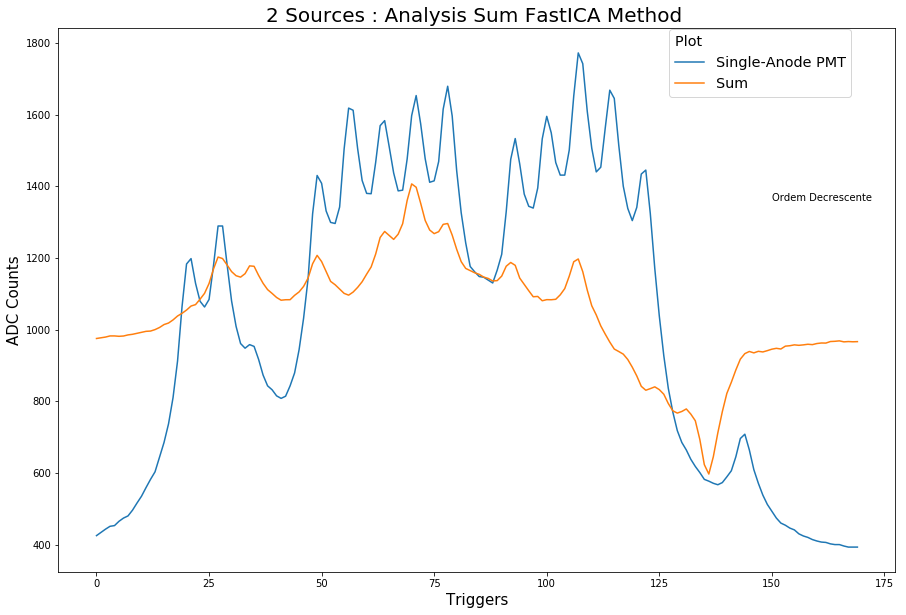

<Figure size 1080x720 with 0 Axes>

In [25]:
sources02=calc_ICA(2,data)
image_plot(sources02,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


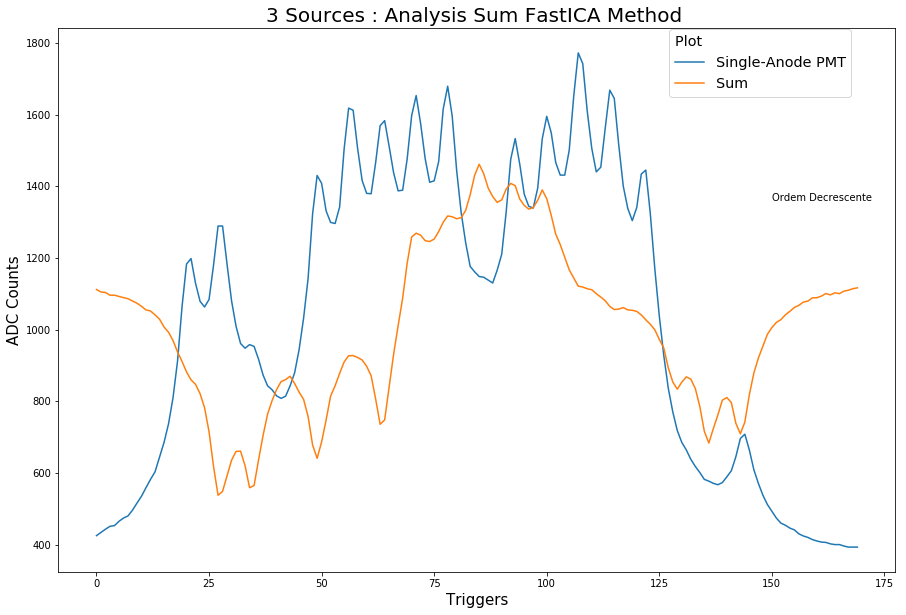

<Figure size 1080x720 with 0 Axes>

In [26]:
sources03=calc_ICA(3,data)
image_plot(sources03,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


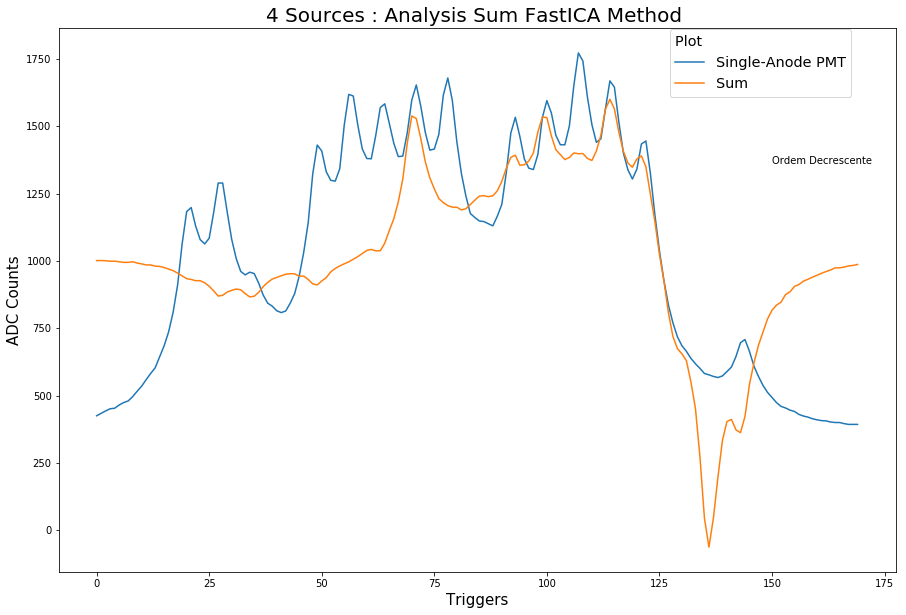

<Figure size 1080x720 with 0 Axes>

In [27]:
sources04=calc_ICA(4,data)
image_plot(sources04,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


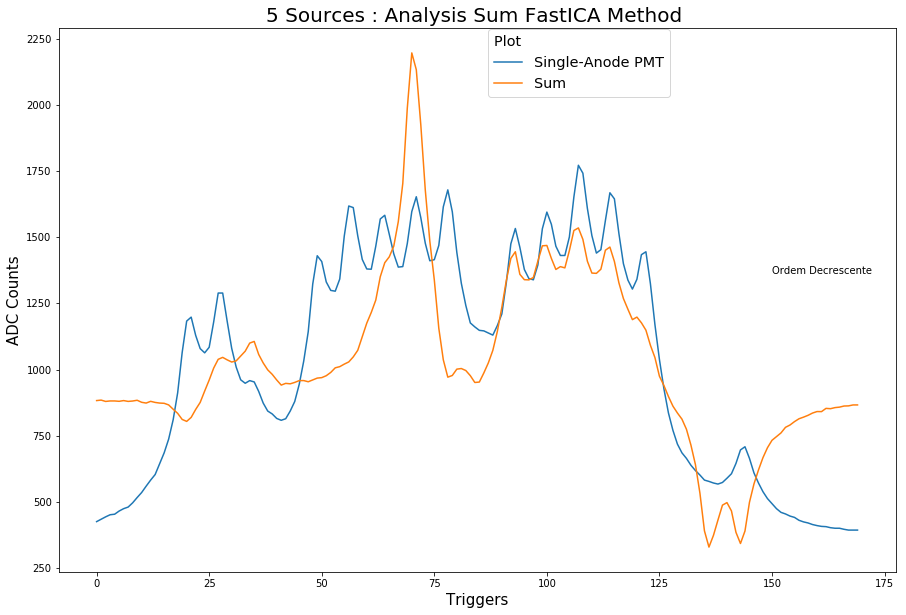

<Figure size 1080x720 with 0 Axes>

In [28]:
sources05=calc_ICA(5,data)
image_plot(sources05,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


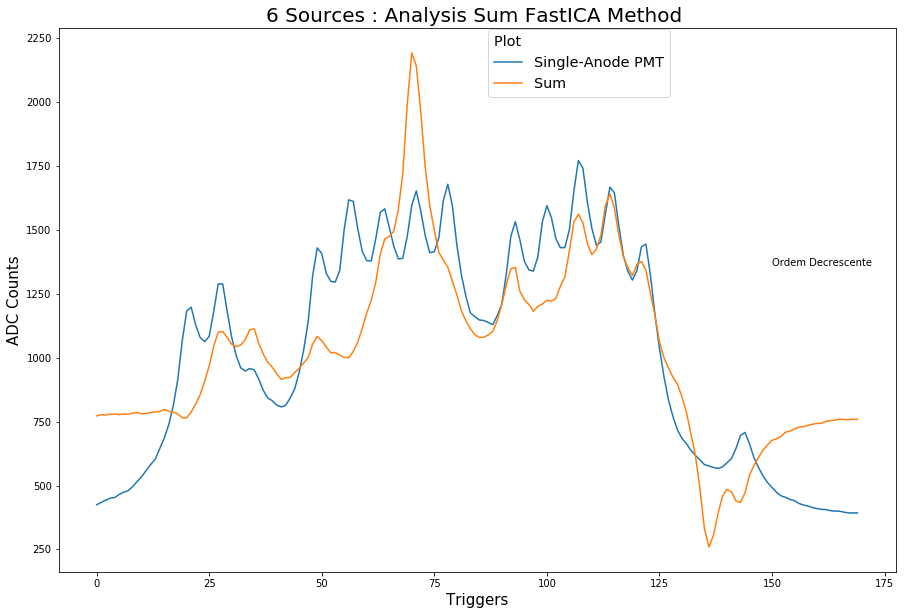

<Figure size 1080x720 with 0 Axes>

In [29]:
sources06=calc_ICA(6,data)
image_plot(sources06,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


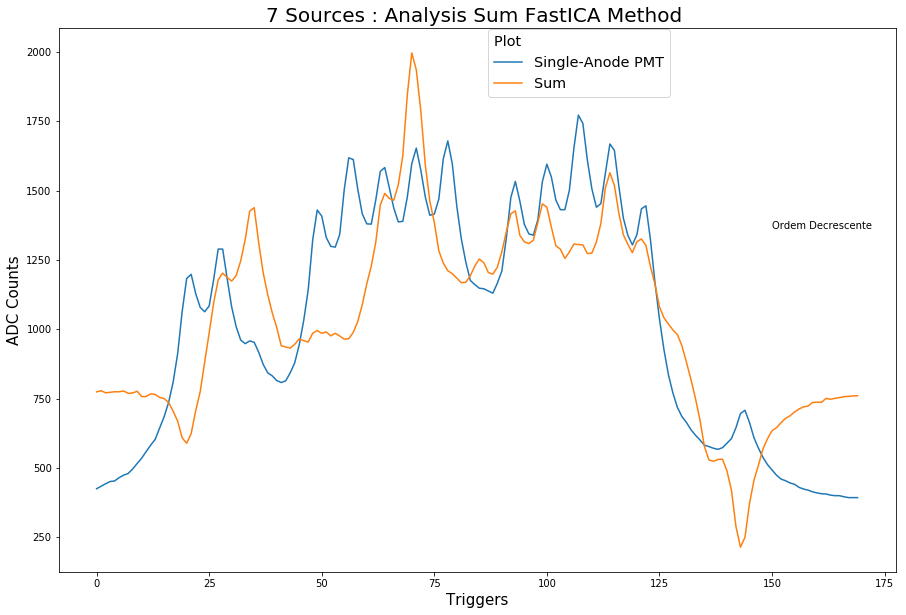

<Figure size 1080x720 with 0 Axes>

In [30]:
sources07=calc_ICA(7,data)
image_plot(sources07,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


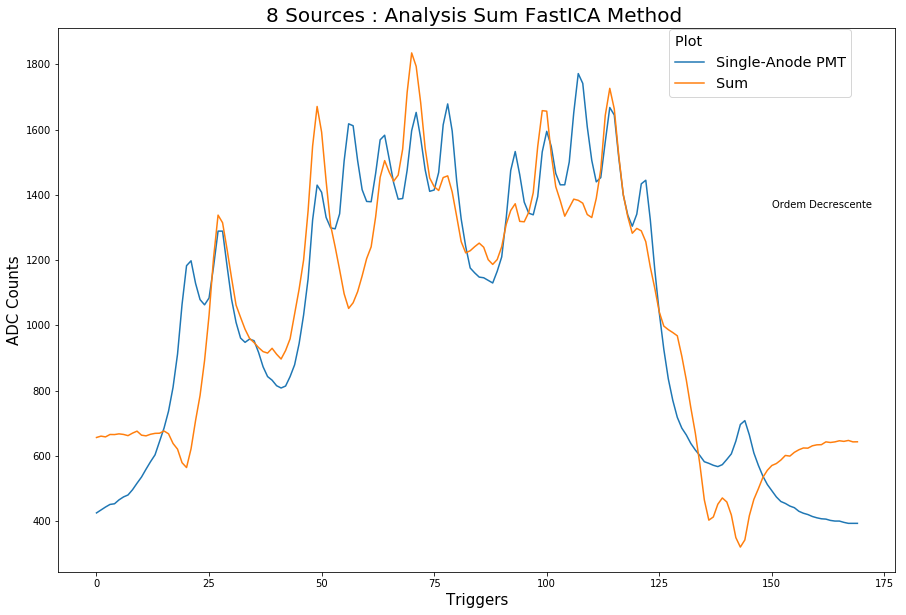

<Figure size 1080x720 with 0 Axes>

In [31]:
sources08=calc_ICA(8,data)
image_plot(sources08,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


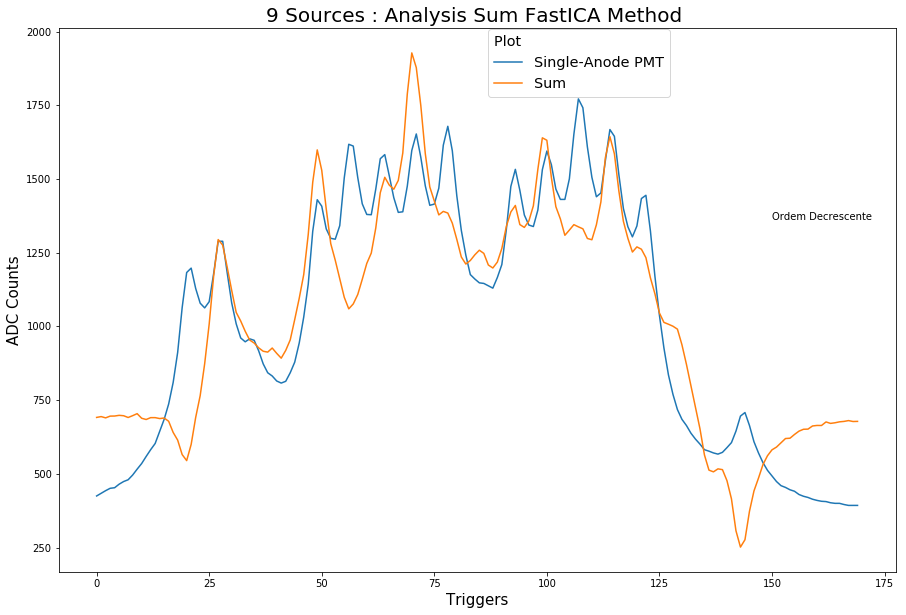

<Figure size 1080x720 with 0 Axes>

In [32]:
sources09=calc_ICA(9,data)
image_plot(sources09,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


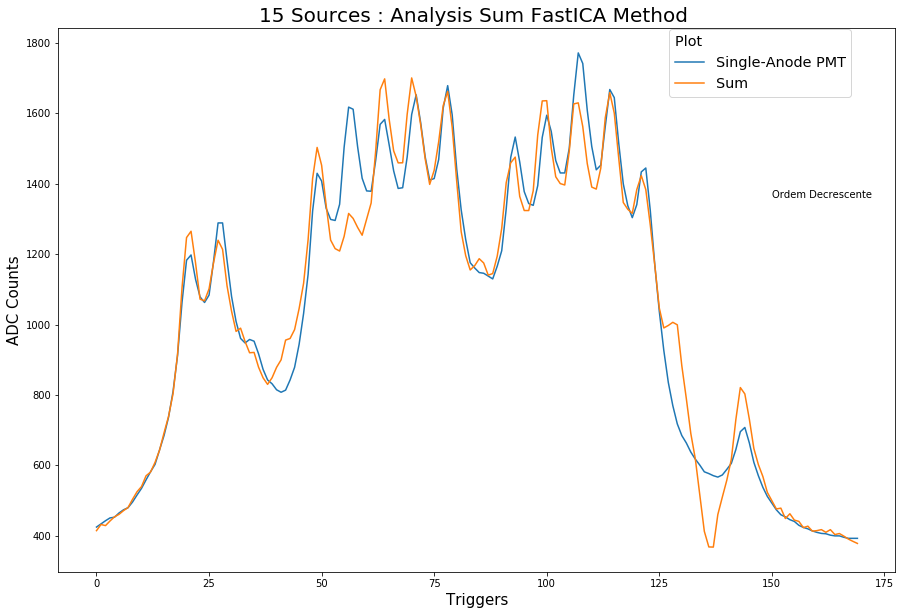

<Figure size 1080x720 with 0 Axes>

In [33]:
sources15=calc_ICA(15,data)
image_plot(sources15,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


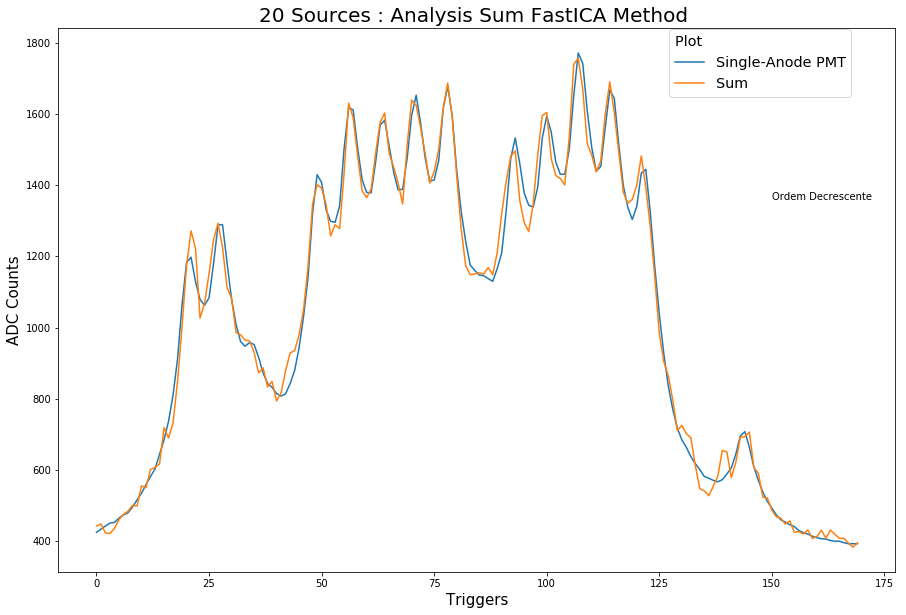

<Figure size 1080x720 with 0 Axes>

In [34]:
sources20=calc_ICA(20,data)
image_plot(sources20,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


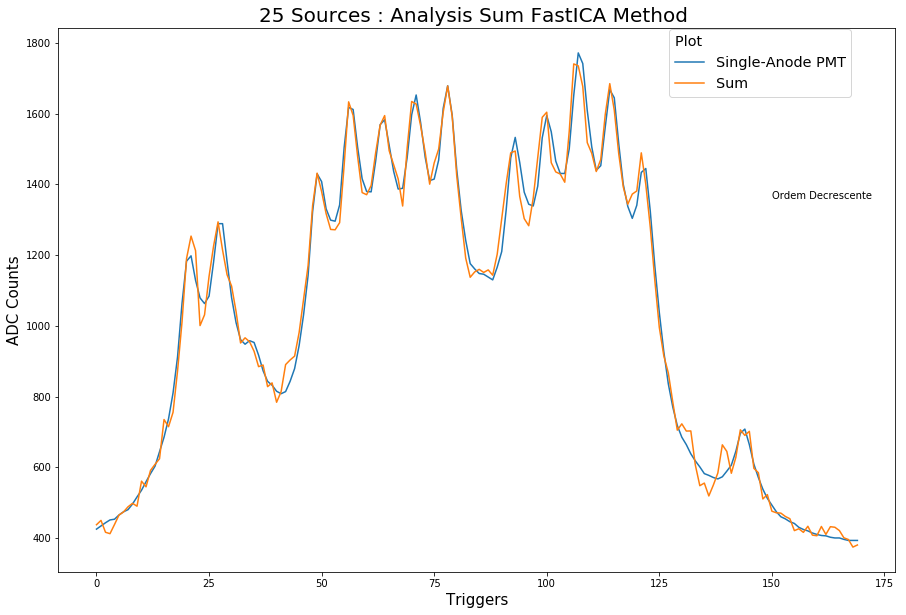

<Figure size 1080x720 with 0 Axes>

In [35]:
sources25=calc_ICA(25,data)
image_plot(sources25,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


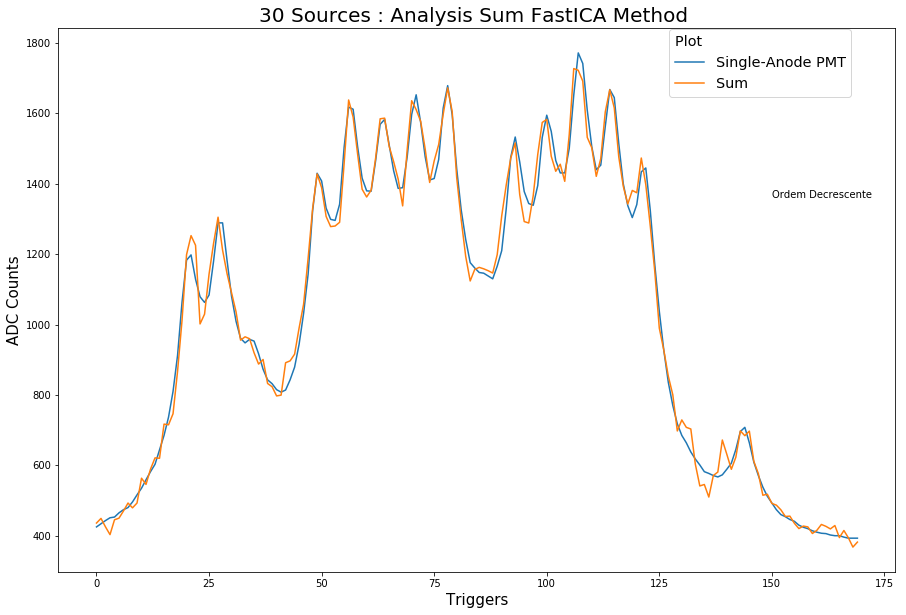

<Figure size 1080x720 with 0 Axes>

In [36]:
sources30=calc_ICA(30,data)
image_plot(sources30,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


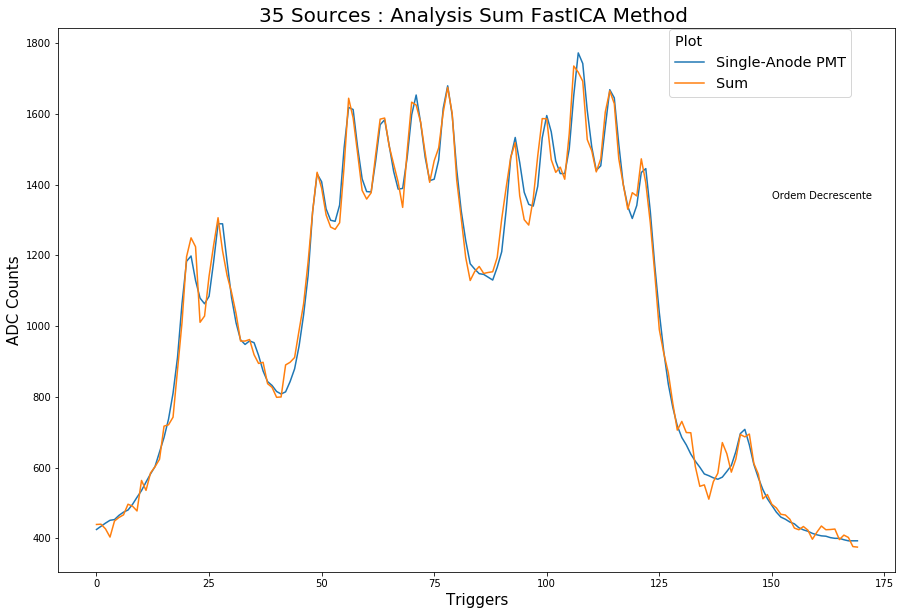

<Figure size 1080x720 with 0 Axes>

In [37]:
sources35=calc_ICA(35,data)
image_plot(sources35,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


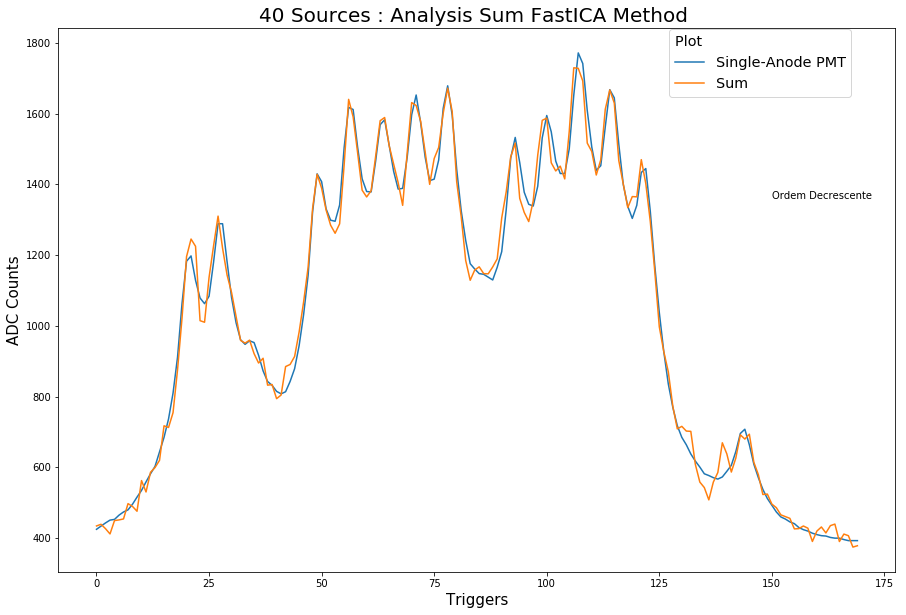

<Figure size 1080x720 with 0 Axes>

In [38]:
sources40=calc_ICA(40,data)
image_plot(sources40,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


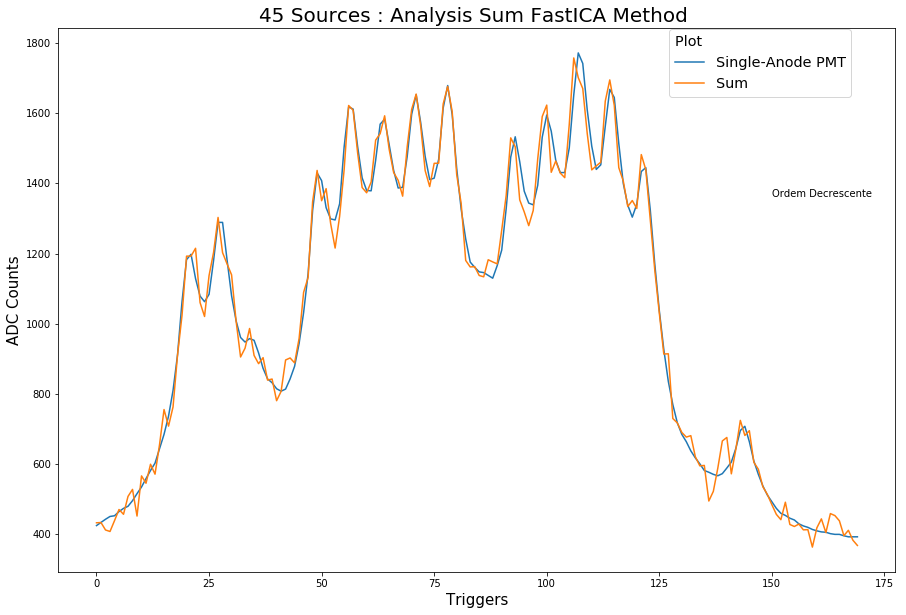

<Figure size 1080x720 with 0 Axes>

In [39]:
sources45=calc_ICA(45,data)
image_plot(sources45,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


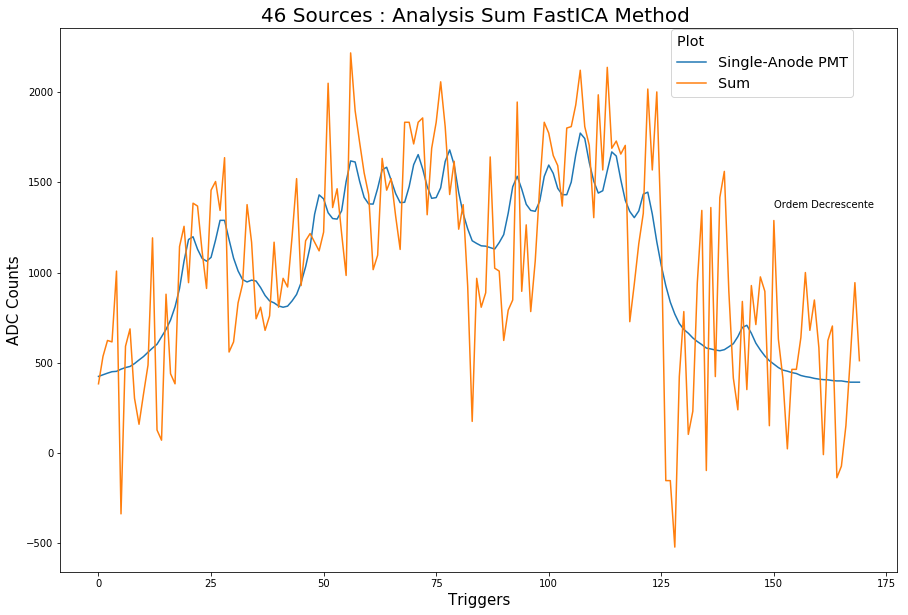

<Figure size 1080x720 with 0 Axes>

In [40]:
sources46=calc_ICA(46,data)
image_plot(sources46,single_anode)
#Tem 2 canais 23